In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
os.chdir('/fast/work/groups/ag_kircher/ReMM/MA_Lusi/Snakemake')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

###  Prepare data

In [3]:
df19 = pd.read_csv('output/features/annotated/hg19/SNVs.hg19.combined.txt.gz', sep = '\t',header = None)
df38 = pd.read_csv('output/features/annotated/hg38/SNVs.hg38.combined.txt.gz', sep = '\t',header = None)
lift= pd.read_csv('output/predictions/lifted/new/hg38.predictions.lifted.txt', sep = '\t',header = None)


df38.index= df38[1].astype(str)+'-'+(df38[2]).astype(str)
df19.index= df19[1].astype(str)+'-'+(df19[2]).astype(str)
#print(df19.memory_usage().sum()/a,df38.memory_usage().sum()/a,lift.memory_usage().sum()/a)

col = pd.read_csv('input/variants/hg38/SNVs.hg38.positive.annotated.tsv.gz', sep = '\t')
#df38 = df38.drop(columns = [0])
df38.columns  = ['Score']+col.columns.str.strip().to_list()
df38['ID']=list(range(0,len(df38)))

col = pd.read_csv('input/variants/hg19/SNVs.hg19.positive.annotated.tsv.gz', sep = '\t')
#df19 = df19.drop(columns = [0])

df19.columns  = ['Score']+col.columns.str.strip().to_list()

df19.columns = df19.columns.str.replace('46way','')
df19.columns = df19.columns.str.replace('fantom','Fantom')

df38 = df38.fillna(0)
df19 = df19.fillna(0)

p = lift[2].str.split(':', expand = True)[1].astype(int)
lift.index = lift[2].str.split(':', expand = True)[0]+'-'+p.astype(str)

f = df38.join(lift,lsuffix='_38',rsuffix='_lift',how='inner')
f.index= f[0].astype(str)+'-'+(f[1]).astype(str)

ff = f.join(df19,lsuffix='_38',rsuffix='_19',how='inner')


fd = ff.drop_duplicates('ID')
fd = fd.drop(columns = ['CHR_19', 'POSITION_19','CHR_38', 'POSITION_38',0,1,2])

#fd = fd.round(5)
#fd.to_csv('output/predictions/lifted/new/ff.dataframe.txt',sep = '\t',index = True,header = True)




In [6]:
fd.head()

,Score_38,ID,CpGperGC_38,CpGperCpG_38,CpGobsExp_38,priPhyloP_38,verPhastCons_38,mamPhastCons_38,EncH3K27Ac_38,EncH3K4Me1_38,EncH3K4Me3_38,DnaseClusteredHyp_38,DnaseClusteredScore_38,Fantom5Perm_38,GerpRS_38,GerpRSpv_38,rareVar_38,commonVar_38,fracRareCommon_38,dbVARCount_38,numTFBSConserved_38,GCContent_38,priPhastCons_38,verPhyloP_38,mamPhyloP_38,ISCApath_38,DGVCount_38,Fantom5Robust_38,Score_19,CpGobsExp_19,CpGperCpG_19,CpGperGC_19,DGVCount_19,DnaseClusteredHyp_19,DnaseClusteredScore_19,EncH3K27Ac_19,EncH3K4Me1_19,EncH3K4Me3_19,GCContent_19,GerpRS_19,GerpRSpv_19,ISCApath_19,commonVar_19,dbVARCount_19,Fantom5Perm_19,Fantom5Robust_19,fracRareCommon_19,mamPhastCons_19,mamPhyloP_19,numTFBSConserved_19,priPhastCons_19,priPhyloP_19,rareVar_19,verPhastCons_19,verPhyloP_19
chr1-100000176,0,494958,0.00000,0.00000,0.00000,-1.46000,0.00000,0.00200,13.36000,4.12000,1.00000,28.00000,777.00000,0.00000,639.26000,0.00000,43.00000,2.00000,0.95600,10.00000,1.00000,0.43700,0.52600,-2.48300,-1.06600,8.00000,1.00000,0.00000,0,0.00000,0.00000,0.00000,1.00000,18.00000,600.00000,10.00000,21.56000,6.68000,0.43700,364.40000,0.00000,6.00000,2.00000,1.00000,0.00000,0.00000,0.88900,0.00000,-2.15500,0.00000,0.36100,-1.91400,16.00000,0.00000,-1.60900
chr1-10000026,0,55311,0.00000,0.00000,0.00000,-0.41000,0.02600,0.02600,1.92000,4.00000,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,253.00000,7.00000,0.97300,28.00000,0.00000,0.52300,0.01300,-0.52400,-0.36200,20.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,5.00000,13.24000,0.52300,0.00000,0.00000,13.00000,4.00000,0.00000,0.00000,0.00000,0.86200,0.03500,-1.40400,0.00000,0.03500,-1.48900,25.00000,0.04000,-1.28600
chr1-100000432,0,494959,0.00000,0.00000,0.00000,-0.16500,0.00700,0.03000,10.08000,2.00000,4.44000,0.00000,0.00000,0.00000,90.88000,0.00000,41.00000,3.00000,0.93200,10.00000,0.00000,0.37100,0.19900,0.24900,-0.10500,8.00000,1.00000,0.00000,0,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,5.00000,11.76000,4.28000,0.37100,0.00000,0.00000,6.00000,3.00000,1.00000,0.00000,0.00000,0.83300,0.00300,0.05000,0.00000,0.10600,-0.18700,15.00000,0.01500,0.14600
chr1-10000069,0,55312,0.00000,0.00000,0.00000,-1.43300,0.00200,0.00700,1.92000,1.88000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,238.00000,6.00000,0.97500,28.00000,0.00000,0.51700,0.00300,-1.66500,-1.41600,20.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.88000,4.76000,14.44000,0.51700,0.00000,0.00000,13.00000,3.00000,0.00000,0.00000,0.00000,0.90600,0.01500,-1.15700,0.00000,0.01600,-1.16000,29.00000,0.01800,-1.11000
chr1-100000837,0,494960,0.00000,0.00000,0.00000,-0.80500,0.00000,0.00800,5.16000,8.36000,2.92000,0.00000,0.00000,0.00000,0.00000,0.00000,36.00000,7.00000,0.83700,10.00000,1.00000,0.37100,0.04200,0.04800,-0.82100,8.00000,1.00000,0.00000,0,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,4.56000,16.40000,5.56000,0.37100,0.00000,0.00000,6.00000,7.00000,1.00000,0.00000,0.00000,0.72000,0.00000,-0.23300,1.00000,0.01100,-0.74400,18.00000,0.00000,-0.22700


In [21]:
# normalize and save the data 
### FALSCH!!!
from sklearn import preprocessing

cols = fd.columns
fd = fd.round(5)
f = preprocessing.normalize(fd,axis = 1)
f = pd.DataFrame(f)
f.columns = cols

f['Score_38'] =fd.reset_index()['Score_38']
f['Score_19'] =fd.reset_index()['Score_19']


col = pd.read_csv('input/variants/hg38/SNVs.hg38.positive.annotated.tsv.gz', sep = '\t')
cols = col.columns[3:]
cols
#f.to_csv('output/predictions/lifted/new/ff.dataframe.normiert.txt',sep = '\t',index = True,header = True),float_format='%.5f'

Index(['CpGperGC', 'CpGperCpG', 'CpGobsExp', 'priPhyloP', 'verPhastCons',
       'mamPhastCons', 'EncH3K27Ac', 'EncH3K4Me1', 'EncH3K4Me3',
       'DnaseClusteredHyp', 'DnaseClusteredScore', 'Fantom5Perm', 'GerpRS',
       'GerpRSpv', 'rareVar', 'commonVar', 'fracRareCommon', 'dbVARCount',
       'numTFBSConserved', 'GCContent', 'priPhastCons', 'verPhyloP',
       'mamPhyloP', 'ISCApath', 'DGVCount', 'Fantom5Robust'],
      dtype='object')

In [22]:
f.head()

,Score_38,ID,CpGperGC_38,CpGperCpG_38,CpGobsExp_38,priPhyloP_38,verPhastCons_38,mamPhastCons_38,EncH3K27Ac_38,EncH3K4Me1_38,EncH3K4Me3_38,DnaseClusteredHyp_38,DnaseClusteredScore_38,Fantom5Perm_38,GerpRS_38,GerpRSpv_38,rareVar_38,commonVar_38,fracRareCommon_38,dbVARCount_38,numTFBSConserved_38,GCContent_38,priPhastCons_38,verPhyloP_38,mamPhyloP_38,ISCApath_38,DGVCount_38,Fantom5Robust_38,Score_19,CpGobsExp_19,CpGperCpG_19,CpGperGC_19,DGVCount_19,DnaseClusteredHyp_19,DnaseClusteredScore_19,EncH3K27Ac_19,EncH3K4Me1_19,EncH3K4Me3_19,GCContent_19,GerpRS_19,GerpRSpv_19,ISCApath_19,commonVar_19,dbVARCount_19,Fantom5Perm_19,Fantom5Robust_19,fracRareCommon_19,mamPhastCons_19,mamPhyloP_19,numTFBSConserved_19,priPhastCons_19,priPhyloP_19,rareVar_19,verPhastCons_19,verPhyloP_19
0,0,1.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00003,0.00001,0.00000,0.00006,0.00157,0.00000,0.00129,0.00000,0.00009,0.00000,0.00000,0.00002,0.00000,0.00000,0.00000,-0.00001,-0.00000,0.00002,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00004,0.00121,0.00002,0.00004,0.00001,0.00000,0.00074,0.00000,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00003,0.00000,-0.00000
1,0,0.99999,0.00000,0.00000,0.00000,-0.00001,0.00000,0.00000,0.00003,0.00007,0.00005,0.00000,0.00000,0.00000,0.00000,0.00000,0.00457,0.00013,0.00002,0.00051,0.00000,0.00001,0.00000,-0.00001,-0.00001,0.00036,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00004,0.00009,0.00024,0.00001,0.00000,0.00000,0.00024,0.00007,0.00000,0.00000,0.00000,0.00002,0.00000,-0.00003,0.00000,0.00000,-0.00003,0.00045,0.00000,-0.00002
2,0,1.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00002,0.00000,0.00001,0.00000,0.00000,0.00000,0.00018,0.00000,0.00008,0.00001,0.00000,0.00002,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00002,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00002,0.00001,0.00000,0.00000,0.00000,0.00001,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00003,0.00000,0.00000
3,0,0.99999,0.00000,0.00000,0.00000,-0.00003,0.00000,0.00000,0.00003,0.00003,0.00004,0.00000,0.00000,0.00000,0.00000,0.00000,0.00430,0.00011,0.00002,0.00051,0.00000,0.00001,0.00000,-0.00003,-0.00003,0.00036,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00005,0.00009,0.00026,0.00001,0.00000,0.00000,0.00024,0.00005,0.00000,0.00000,0.00000,0.00002,0.00000,-0.00002,0.00000,0.00000,-0.00002,0.00052,0.00000,-0.00002
4,0,1.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00001,0.00002,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00007,0.00001,0.00000,0.00002,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00002,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00003,0.00001,0.00000,0.00000,0.00000,0.00001,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00004,0.00000,-0.00000


In [3]:
## normalized data prepared by Martin
fm = pd.read_csv('/data/groups/ag_kircher/ReMM/MA_Lusi/SingleFeatureImpact/cleaned_scaled_combined_annotations.tsv.gz',sep='\t')
#col = pd.read_csv('input/variants/hg38/SNVs.hg38.positive.annotated.tsv.gz', sep = '\t')
#cols = col.columns[3:]

/fast/users/nazaretl_c/work/miniconda/envs/jupyter/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
df19 = f.iloc[:,f.columns.str.contains('_19',na = False)]
df19.columns = df19.columns.str.replace('_19','')
df38 = f.iloc[:,f.columns.str.contains('_38',na = False)]
df38.columns = df38.columns.str.replace('_38','')

In [ ]:
f['Label_19']=f['Label_38']

In [ ]:
## devide into positive and negative sets
f = f.reset_index(drop =True)
p = f[f['Label_38']==1]
n = f[f['Label_38']==0]

### Run linear and logistic regressoins, calculate correlations and means of feature values 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance
import random

# dataframes to append lists with importance and correaltions
# each column is a list from one run (in total 100 for each genome build)
logistic = pd.DataFrame()
distances = pd.DataFrame()
linear = pd.DataFrame()
correlations = pd.DataFrame()

means_pos = pd.DataFrame()
means_neg = pd.DataFrame()

for i in range (0,100):
    # sample 406 random data points from the negative set
    s = random.sample(range(0, len(f)),406)
    df = n[n.index.isin(s)]
    # append the positive dataset
    df = df.append(p)
    
    # list of dataframes with 802 data points to calculate the euclidean distance 
    frames = []
    
    for a in ['_19','_38']:
        
        # lists to append importance and correlation values vor each iteration
        linear_list = []
        logistic_list = []
        correlations_list = []
        distances_list = []
        # filter for hg19 or hg38
        df_a = df.iloc[:,df.columns.str.contains(a,na = False)]
        df_a.columns = df_a.columns.str.replace(a,'')

        # devide into positive and negatove for feature means
        df_a_pos = df_a.loc[df_a['Label']==1,cols]
        df_a_neg = df_a.loc[df_a['Label']==0,cols]
        
        
        # calculate feature means 
        means_pos[str(i)+a] = df_a_pos.mean(axis = 0)
        means_neg[str(i)+a] = df_a_neg.mean(axis = 0)

        frames.append(df_a)
        
        for column in cols:
            # choose the column for the univariate analysis 
            X = df_a.loc[:,column].to_numpy().reshape(-1, 1)
            y = df_a['Label']
            
            # calculate the linear model
            model = LinearRegression().fit(X, y)
            importance = model.coef_[0]
            linear_list.append(importance)
            
            # calculate the logistic model
            model = LogisticRegression().fit(X, y)
            importance = model.coef_[0]
            logistic_list.append(importance[0])
            
            # calculate the correlation between scores (y) and feature (X)
            # c is a df with two columns, df.corr() returns a correlation matrix
            c = pd.DataFrame([list(X.flatten()),y]).T.corr().iloc[1,0]
            correlations_list.append(c)
            
           
        # lists are columns of final dataframes
        linear[str(i)+a] = linear_list
        logistic[str(i)+a] = logistic_list
        correlations[str(i)+a] = correlations_list
        
    # calculate euclidean distance     
    for column in cols: 
        dist = distance.euclidean(frames[0].loc[:,column], frames[1].loc[:,column])
        distances_list.append(dist)

    distances[str(i)+a] = distances_list




            



In [7]:
def kop(tog,name):        
    # input: dataframe with results of the loop (see example above)
    # output: a dataframe with two columns (hg19 and hg38) with means from the runs
    
    
    a = tog.loc[:,tog.columns.str.contains('_19')].mean(axis = 1)
    b = tog.loc[:,tog.columns.str.contains('_38')].mean(axis = 1)

    alle = pd.DataFrame([a,b]).T
    alle['index'] = cols#.append(cols)
    alle = alle.set_index('index')

    alle.index.name=''
    alle.columns = ['ReMM '+name,'parSMURF '+name]
    return  alle

In [ ]:

# join all the means in one table
al = kop(linear,'Linear').join(kop(logistic,'Logistic')).join(kop(means_pos, 'Positive Mean'))
al = al.join(kop(means_neg, 'Negative Mean')).join(kop(correlations, 'Correlation'))




In [ ]:
# add euclidean distance
d = distances.mean(axis = 1)
d.name = 'Euclidean Distance'
d.index = cols
al= al.join(d)

al['Euclidean Distance'] = al['Euclidean Distance'].astype(float).round(5)

In [8]:
col = pd.read_csv('input/variants/hg38/SNVs.hg38.positive.annotated.tsv.gz', sep = '\t')


In [ ]:
# add parSMURF Tree means
col = pd.read_csv('input/variants/hg38/SNVs.hg38.positive.annotated.tsv.gz', sep = '\t')


imp = pd.DataFrame()
for i in range(99):
    df = pd.read_csv('models/hg38/'+str(i)+'.out.importance',sep = ' ',header = None)
    imp[i]=df[1]

imp.index = col.columns[3:]
imp = imp.mean(axis = 1)
imp = pd.DataFrame(imp)


imp.columns = ['ParSMURF Tree']
df_order = pd.DataFrame(imp).join(al)

df_order.head()


In [ ]:
# order of values: order descending, add a columns with list from 1 to 26
for c in df_order.columns:
    df_order = df_order.sort_values(by=[c], ascending = False)
    df_order[c+' Order'] = list(range(1,27))


In [ ]:
df_order.iloc[:,-12:]

In [ ]:
# df_order[['ReMM Linear Order','ReMM Correlation Order','parSMURF Linear Order','parSMURF Correlation Order']].sort_values(by=['parSMURF Linear Order'], ascending = True)




###  parSMURF Importance 

#### Correlation between ReMM and scores for GRCh37 computed with parSMURF

In [5]:
df =pd.read_csv('output/predictions/hg19/remm_with_ps_predictions.csv',sep ='\t',compression = 'gzip',header = None)
var = pd.read_csv('output/features/annotated/hg19/SNVs.hg19.combined.txt.gz',sep = '\t', compression = 'gzip',header = None, usecols = [0,1,2])
ps = pd.read_csv('output/predictions/hg19/SNVs.hg19.predictions.txt', sep = '\t',header = None)

var['prediction']=ps[0]
df['id']=df[0]+'-'+df[1].astype(str)
var['id']=var[1]+'-'+var[2].astype(str)
var = var.set_index('id')
df = df.set_index('id')

fc = var.join(df, how='inner',lsuffix = 'ps',rsuffix='remm')

fc[['prediction','2remm']].corr()

,prediction,2remm
prediction,1.0000,0.8880
2remm,0.8880,1.0000


In [ ]:
import random 
df = fc.reset_index()
a = []
for i in range(10):
    s = random.sample(range(0, len(fc)),100000)
    df0 = df[df.index.isin(s)]
    print(df0.shape)
    a.append(df0[['prediction','2remm']].corr().iloc[0,1])

#### Importance 

In [35]:
## read in importance files of all trees
def getImportance(hg): 
    file  = 'input/variants/'+hg+'/SNVs.'+hg+'.positive.annotated.tsv.gz'
    #print(file)
    col = pd.read_csv(file, sep = '\t')
    #print(col.columns)


    imp = pd.DataFrame()
    for i in range(99):
        df = pd.read_csv('models/'+hg+'/'+str(i)+'.out.importance',sep = ' ',header = None)
        imp[i]=df[1]

    c=3
    if hg=='hg19':
        c = 2
        col.columns = col.columns.str.replace('46way','').str.replace('fantom','Fantom')
    
    imp.index = col.columns[c:]
    imp = imp.mean(axis = 1)
    imp = pd.DataFrame(imp)
    imp.columns = ['ParSMURF Tree']
    return imp.round(5)


df_order = getImportance('hg38').join(getImportance('hg19'),lsuffix = '_hg38',rsuffix = '_hg19')


#### Correlation

In [36]:
f.name = 'RoundAndNorm'
fd.name = 'Raw'
alle = [f]

for df in alle:
    dfs = []
    for a in ['_19','_38']:
        df_a = df.iloc[:,df.columns.str.contains(a,na = False)]
        df_a.columns = df_a.columns.str.replace(a,'')
        dfs.append(df_a)
    a = dfs[0].corrwith(dfs[1])
    a = pd.DataFrame(a)
    a.columns = [df.name]
    df_order = df_order.join(a,how ='inner')


In [37]:
for c in df_order.columns:
    df_order = df_order.sort_values(by=[c], ascending = False)
    df_order[c+' Order'] = list(range(1,27))

In [38]:
df_order.sort_values(by=['ParSMURF Tree_hg38'], ascending = False)

,ParSMURF Tree_hg38,ParSMURF Tree_hg19,RoundAndNorm,ParSMURF Tree_hg38 Order,ParSMURF Tree_hg19 Order,RoundAndNorm Order
priPhyloP,0.10486,0.12305,0.78764,1,1,11
mamPhyloP,0.07140,0.03891,0.67057,2,2,18
numTFBSConserved,0.02224,0.00446,0.21322,3,16,22
priPhastCons,0.01898,0.02240,0.86599,4,5,8
verPhyloP,0.01787,0.03241,0.81301,5,3,10
CpGobsExp,0.01319,0.01244,0.96964,6,7,4
Fantom5Perm,0.01311,0.00000,0.01529,7,25,25
mamPhastCons,0.01289,0.02650,0.67819,8,4,17
CpGperCpG,0.01249,0.01081,0.97054,9,10,3
CpGperGC,0.01140,0.01308,0.95238,10,6,6


In [40]:
df_order['diff'] = df_order['ParSMURF Tree_hg38 Order']-df_order['ParSMURF Tree_hg19 Order']
df_order[['diff',df.name]].corr()

,diff,RoundAndNorm
diff,1.00000,0.36103
RoundAndNorm,0.36103,1.00000


In [70]:
df_order = df_order[['ParSMURF Tree_hg19','ParSMURF Tree_hg38','Correlation','ParSMURF Tree_hg19 Order','ParSMURF Tree_hg38 Order','Correlation Order']]

df_order.sort_values(by=['ParSMURF Tree_hg38'], ascending = False).to_latex('figures/importance.latex')

### Plot parSMURF Importance grouped by features



In [71]:
m = df_order[['ParSMURF Tree_hg38','ParSMURF Tree_hg19']].max().min()


In [77]:
df_order['group'] ='Epigenetic profile'
ind = df_order.index[df_order.index.str.contains('GC|CpG')].to_list()
df_order.loc[ind,'group']='GC-based'
ind = df_order.index[df_order.index.str.contains('PhastCons|PhyloP|Gerp')].to_list()
df_order.loc[ind,'group']='Conservation and constraint'
ind = df_order.index[df_order.index.str.contains('Var|VAR|ISCApath|fracRareCommon|dbVARCount|DGVCount')].to_list()
df_order.loc[ind,'group']='Genetic variation'
colors = {'Epigenetic profile':'teal','GC-based':'lightblue','Conservation and constraint':'steelblue','Genetic variation':'lightsteelblue'}
#a = df_order.sort_values(by=[feature], ascending = True)

df_order['color'] = df_order['group'].map(colors)

In [78]:
colors = {'Epigenetic profile':'teal','GC-based':'lightblue','Conservation and constraint':'steelblue','Genetic variation':'lightsteelblue'}
#colors = {'teal':0,'lightblue':1,'steelblue':2,'lightsteelblue':3}
#a = df_order.sort_values(by=[feature], ascending = True)
#a['color'] = a['group'].map(colors)

<ipython-input-83-dc11cba084c5>:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "di" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('figures/'+feature+'_bar.png',di=30,bbox_inches='tight')


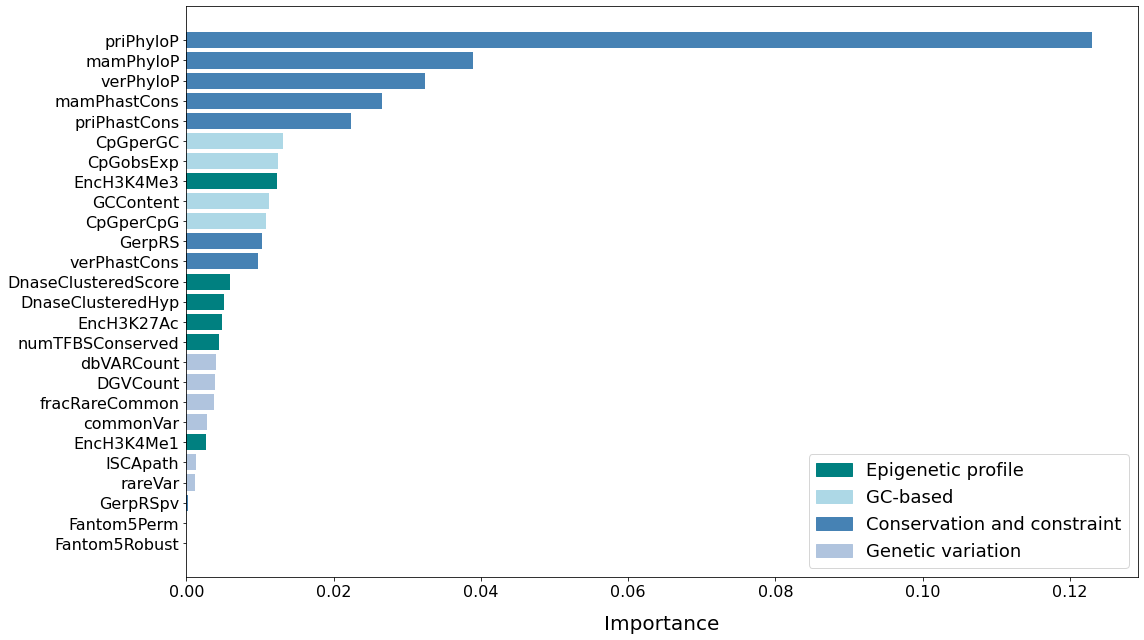

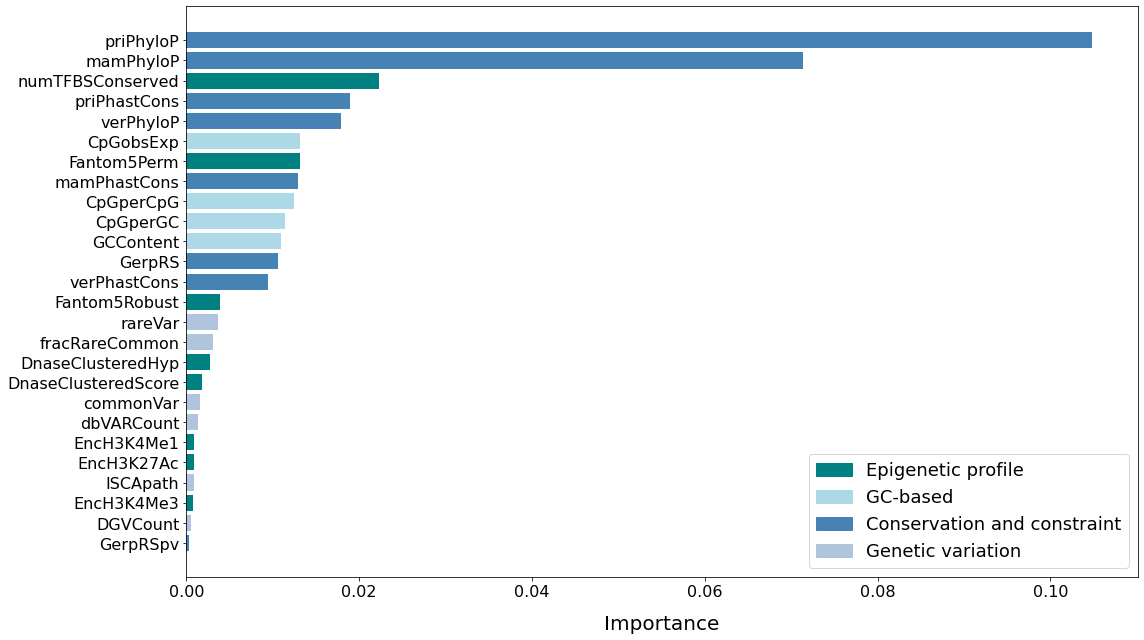

In [83]:
x = 2


feature = 'ParSMURF Tree_hg38'
features = ['ParSMURF Tree_hg19','ParSMURF Tree_hg38']

for feature in features:
    a = df_order.sort_values(by=[feature], ascending = True)

    #a['group'] = a['group'].map(colors)

    #colors = {0:'teal',1:'lightblue',2:'steelblue',3:'lightsteelblue'}
    
    fig,ax = plt.subplots(figsize=(16,9))


    ax.barh(a.index, a.loc[:,feature],color = a.loc[:,'color'])
    ax.set_xlabel('Importance', fontsize = 10*x,labelpad=15)
    #ax.set_ylabel('Feture',fontsize = 10*x,labelpad=10)
    ax.tick_params(axis='both',  labelsize=8*x)
    #ax.set_xlim([0, 0.5])
    #ax.set_xbound(lower=0.0, upper=m)
    ax.autoscale(enable=True, axis='y')
    plt.legend(*zip(*[(plt.Rectangle((0,0), 1,1, color=c), f"{i}") for i,c in colors.items()]),fontsize = 9*x,loc = 4) 
    plt.tight_layout()

    plt.savefig('figures/'+feature+'_bar.png',di=30,bbox_inches='tight')

